In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.linear_model import LinearRegression

In [2]:
# hide warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# better plots
sns.set(rc={'figure.figsize':(12,8)});

In [4]:
directory = os.path.dirname(os.getcwd())
directory

'd:\\github\\AssignmentEconometricsIV'

## Question

The first question consists of a factor analysis of a large dataset. We consider monthly close-to-
close excess returns from a cross-section of 9,456 firms traded in the New York Stock Exchange.
The data starts on November 1991 and runs until December 2018. There are 326 monthly
observations in total. 

In addition to the returns we also consider 16 monthly factors: 

- Market (MKT)
- Small-minus-Big (SMB)
- High-minus-Low (HML)
- Conservative-minus-Aggressive (CMA)
- Robust-minus-Weak (RMW)
- earning/price ratio (EP)
- cash-flow/price ratio (CFP)
- dividend/price ratio
- accruals (ACC)
- market beta (BETA)
- net share issues 
- daily variance (RETVOL)
- daily idiosyncratic variance (IDIOVOL)
- 1-month momentum (MOM1)
- 36-month momentum (MOM36)

The dataset is organized as an excel file named `returns.xlsx`.

In [5]:
input_path = f'{directory}\\data\\returns.xlsx'
df = pd.read_excel(input_path, index_col=0)

In [6]:
df.head()

,MKT,HML,SMB,MOM1,MOM36,ACC,BETA,CFP,CHCSHO,DY,...,r_9447,r_9448,r_9449,r_9450,r_9451,r_9452,r_9453,r_9454,r_9455,r_9456
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,-0.041264,-0.028083,0.004779,-0.007336,-0.025496,-0.013692,0.035433,-0.015116,-0.006771,-0.001226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-12-31,0.107984,-0.022529,-0.027366,0.010963,-0.021188,-0.027887,-0.082499,-0.032122,-0.005893,-0.037563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-01-31,-0.007668,0.051012,0.085547,0.050916,0.108588,0.021978,-0.072801,0.028117,-0.008193,-0.014228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-02-28,0.010796,0.070501,0.002794,-0.027398,0.079286,0.003860,-0.024906,0.037363,0.015625,0.022895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-03-31,-0.025367,0.039029,-0.015135,-0.009367,0.024631,0.004612,0.041266,0.037916,0.017117,0.046819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
factors_name = df.columns[:16]
factors_name

Index(['MKT', 'HML', 'SMB', 'MOM1', 'MOM36', 'ACC', 'BETA', 'CFP', 'CHCSHO',
       'DY', 'EP', 'IDIOVOL', 'CMA', 'UMD', 'RMW', 'RETVOL'],
      dtype='object')

In [8]:
factors = df[factors_name]
factors.head()

,MKT,HML,SMB,MOM1,MOM36,ACC,BETA,CFP,CHCSHO,DY,EP,IDIOVOL,CMA,UMD,RMW,RETVOL
dates,,,,,,,,,,,,,,,,
1991-11-29,-0.041264,-0.028083,0.004779,-0.007336,-0.025496,-0.013692,0.035433,-0.015116,-0.006771,-0.001226,0.001586,0.036246,-0.014193,0.012468,-0.005361,0.026900
1991-12-31,0.107984,-0.022529,-0.027366,0.010963,-0.021188,-0.027887,-0.082499,-0.032122,-0.005893,-0.037563,-0.008621,-0.042074,-0.003394,0.079571,0.032935,-0.029811
1992-01-31,-0.007668,0.051012,0.085547,0.050916,0.108588,0.021978,-0.072801,0.028117,-0.008193,-0.014228,-0.006754,-0.089817,0.019346,-0.026594,0.005965,-0.076449
1992-02-28,0.010796,0.070501,0.002794,-0.027398,0.079286,0.003860,-0.024906,0.037363,0.015625,0.022895,0.016494,-0.012679,0.022658,-0.005968,0.017131,-0.021424
1992-03-31,-0.025367,0.039029,-0.015135,-0.009367,0.024631,0.004612,0.041266,0.037916,0.017117,0.046819,0.032956,0.060565,0.025606,-0.003624,-0.013689,0.027512


In [9]:
returns_name = df.columns[16:]
returns_name

Index(['r_   1', 'r_   2', 'r_   3', 'r_   4', 'r_   5', 'r_   6', 'r_   7',
       'r_   8', 'r_   9', 'r_  10',
       ...
       'r_9447', 'r_9448', 'r_9449', 'r_9450', 'r_9451', 'r_9452', 'r_9453',
       'r_9454', 'r_9455', 'r_9456'],
      dtype='object', length=9456)

In [10]:
returns = df[returns_name]
returns.head()

,r_ 1,r_ 2,r_ 3,r_ 4,r_ 5,r_ 6,r_ 7,r_ 8,r_ 9,r_ 10,...,r_9447,r_9448,r_9449,r_9450,r_9451,r_9452,r_9453,r_9454,r_9455,r_9456
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,0.130715,-0.053900,-0.110696,-0.043900,0.218322,0.050645,0.575047,0.008921,-0.105349,-0.034203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-12-31,-0.010580,-0.056432,0.213591,0.183700,1.299230,0.306545,0.040644,-0.003800,0.318781,0.178492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-01-31,-0.055124,-0.003400,-0.164114,-0.205154,-0.082347,0.075547,-0.024677,-0.066691,0.155137,0.071490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-02-28,-0.202800,5.219422,0.039753,-0.057745,-0.117086,0.204517,-0.089757,-0.083881,0.018253,0.128348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-03-31,0.078418,-0.181971,-0.023808,0.043112,0.415955,0.064782,-0.146257,-0.179871,-0.209586,-0.173690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
daterange = returns.index
daterange

DatetimeIndex(['1991-11-29', '1991-12-31', '1992-01-31', '1992-02-28',
               '1992-03-31', '1992-04-30', '1992-05-29', '1992-06-30',
               '1992-07-31', '1992-08-31',
               ...
               '2018-03-29', '2018-04-30', '2018-05-31', '2018-06-29',
               '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31',
               '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', name='dates', length=326, freq=None)

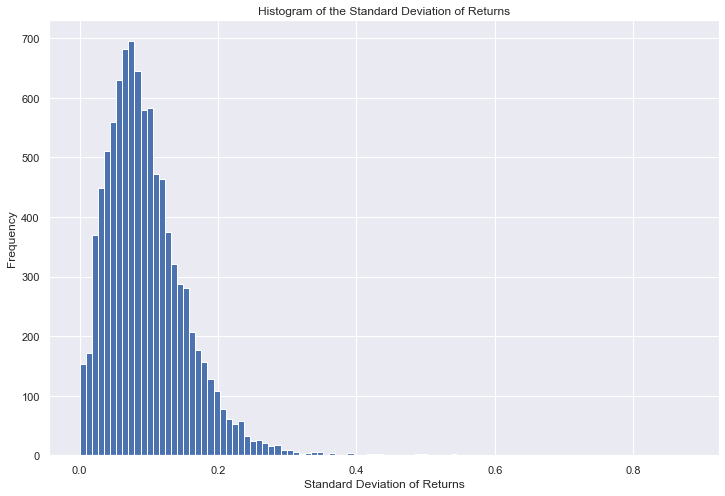

In [12]:
plt.hist(returns.std(axis=0), bins=100)
plt.xlabel('Standard Deviation of Returns')
plt.ylabel('Frequency')
plt.title('Histogram of the Standard Deviation of Returns');

In [13]:
standard_returns = (returns - returns.mean(axis=0))/returns.std(axis=0)
standard_returns.head()

,r_ 1,r_ 2,r_ 3,r_ 4,r_ 5,r_ 6,r_ 7,r_ 8,r_ 9,r_ 10,...,r_9447,r_9448,r_9449,r_9450,r_9451,r_9452,r_9453,r_9454,r_9455,r_9456
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,1.483764,-0.219996,-0.914187,-0.665776,1.031984,0.207163,3.474317,-0.028135,-0.775232,-0.357849,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1991-12-31,-0.223389,-0.226904,1.435410,2.066812,6.526489,1.869218,0.235135,-0.125593,2.076082,1.415134,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1992-01-31,-0.761584,-0.082197,-1.301224,-2.601812,-0.496389,0.368900,-0.160796,-0.607431,0.975946,0.523187,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1992-02-28,-2.545832,14.169328,0.175881,-0.832001,-0.672972,1.206552,-0.555266,-0.739131,0.055711,0.997142,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1992-03-31,0.851900,-0.569465,-0.284648,0.378895,2.036596,0.298978,-0.897734,-1.474551,-1.475986,-1.520584,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962


In [14]:
# check
print(sum(round(standard_returns.mean(axis=0), 10) == 0))
print(sum(round(standard_returns.std(axis=0), 10) == 1))

9456
9456


The model

$$
\begin{aligned}
Y_t & =\beta_0+\beta_1 X_{1 t}+\cdots+\beta_p X_{n t}+U_t, \quad t=1, \ldots, T \\
& =\boldsymbol{\beta}^{\prime} \boldsymbol{X}_t+U_t \\
\boldsymbol{Y} & =\boldsymbol{X} \boldsymbol{\beta}+\boldsymbol{U} \quad \text { (matrix notation). }
\end{aligned}
$$
However, $n>T$ (more columns than rows in $X$ ).


The usual ordinary least squares (OLS) solution
$$
\widehat{\boldsymbol{\beta}}=\left(X^{\prime} X\right)^{-1} X^{\prime} Y
$$
is not valid anymore.

Solution: reduce the dimension of $\boldsymbol{X}$ by postulating that:

$$
\underset{(n \times 1)}{\boldsymbol{X}_t}=\underset{(n \times k)}{\boldsymbol{\Lambda}} \underset{(k \times 1)}{\boldsymbol{F}_t}+\underset{(n \times 1)}{\boldsymbol{V}_t},
$$
where:
- $F_t$ is a set of $k<<n$ unobserved factors;
- $\boldsymbol{V}_t$ is the vector of idiosyncratic errors;
- $\boldsymbol{\Lambda}$ is the matrix of unobserved factor loadings.

### (a) (30 points) 

Compute the principal components of the returns and determine the optimal number of principal factors by one the methods described in Lecture 2. How much of the variance will the factors be able to explain?

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(standard_returns)

PCA()

Given the desired number of $\mathrm{PCs}$, say $1 \leq k \leq n$, we collect all the vectors $\gamma_1, \ldots \gamma_k$ in a $(n \times k)$ matrix
$$
\Gamma_k:=\left(\gamma_1, \ldots \gamma_k\right)
$$

In [16]:
gamma = pca.components_

The transformed dataset containing only the first $k P C s$ is the $(T \times k)$ matrix is given by
$$
\begin{aligned}
Z_{(k)}&:=\boldsymbol{X} \boldsymbol{\Gamma}_k \\
&:=\left(Z_1, \ldots, Z_k\right) .
\end{aligned}
$$

In [17]:
Z = pca.fit_transform(standard_returns)

Also, by construction, the columns of $Z_{(k)}$ (the PCs) are orthogonal random variables, and with sample variances $\lambda_1, \ldots, \lambda_k$.

Thus, the sample covariance matrix of $Z_{(k)}$ is given by the $(k \times k)$ diagonal matrix
$$
\boldsymbol{\Lambda}_k:=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_k\right)
$$

In [18]:
lambdas = pca.explained_variance_

It is a good idea to start by running a full PCA $(k=n)$ and plotting the quantity
$$
\alpha_j=\frac{\lambda_j}{\sum_{j=1}^n \lambda_j} 
$$
for $j \in\{1, \ldots, n\}$.

In [19]:
alphas = pca.explained_variance_ratio_
cumulated_alphas = pca.explained_variance_ratio_.cumsum()

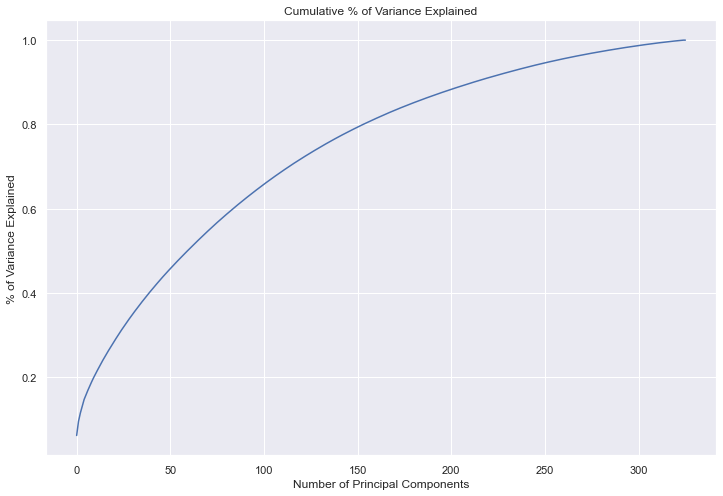

In [20]:
plt.plot(cumulated_alphas)
plt.xlabel('Number of Principal Components')
plt.ylabel('% of Variance Explained')
plt.title('Cumulative % of Variance Explained');

In [21]:
name_cols = []
for i in range(len(Z)):
    name_col = f'PC {i+1}'
    name_cols.append(name_col)

In [22]:
components = pd.DataFrame(Z, index=daterange, columns=name_cols)
components.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 317,PC 318,PC 319,PC 320,PC 321,PC 322,PC 323,PC 324,PC 325,PC 326
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,11.533373,2.117902,7.135382,-2.573324,0.418788,0.085067,-2.505428,-0.983358,1.059950,1.302930,...,-0.276493,-0.030583,0.376828,0.028419,0.223843,0.135267,-0.128892,0.068279,-0.194675,4.442946e-15
1991-12-31,-13.686073,-4.860525,-12.415259,5.514070,-4.081183,-1.011910,4.643956,0.513753,1.382309,1.332409,...,-0.252766,0.053583,-0.084363,0.361802,-0.057501,0.119258,-0.341420,0.227893,0.239768,4.442946e-15
1992-01-31,-13.108576,6.045242,-7.425216,3.134872,3.861093,-5.531348,-1.698935,0.356089,-0.445595,-1.875859,...,-0.180783,-0.079209,-0.037675,-0.018815,-0.161823,0.074299,-0.137390,0.187490,0.068724,4.442946e-15
1992-02-28,-3.926188,1.370226,-2.742426,2.566578,1.095583,-3.776330,-1.430028,-0.642822,-0.863886,0.164132,...,-0.004539,0.263540,-0.167437,0.073019,-0.329672,0.382605,-0.193439,0.037832,0.234330,4.442946e-15
1992-03-31,6.756658,0.843371,4.095032,1.095002,0.037724,-0.869329,-1.048341,-0.354532,0.547573,1.097951,...,0.027332,-0.048225,0.200638,-0.694656,-0.109127,0.178205,-0.220113,-0.074723,0.074600,4.442946e-15


In [23]:
def covariance_matrix(df1, df2):
    # covariance matrix dataframe
    cov_matrix = pd.DataFrame(index=df1.columns, columns=df2.columns)

    # filling the covariance matrix dataframe
    for df1_pca in df1.columns:
        for df2_pca in df2.columns:
            cov_matrix[df2_pca][df1_pca] = df1[df1_pca].cov(df2[df2_pca])
    return(cov_matrix)

In [24]:
Lambda = covariance_matrix(components, components)

Also, by construction, the columns of $Z_{(k)}$ (the $\mathrm{PCs}$) are orthogonal random variables, and with sample variances $\lambda_1, \ldots, \lambda_k$.
Thus, the sample covariance matrix of $Z_{(k)}$ is given by the $(k \times k)$ diagonal matrix
$$
\boldsymbol{\Lambda}_k:=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_k\right) .
$$

In [25]:
Lambda.head(10)[['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10']]

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
PC 1,581.031536,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
PC 2,0.0,317.615798,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
PC 3,0.0,0.0,188.950028,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
PC 4,0.0,0.0,-0.0,154.30857,-0.0,0.0,0.0,0.0,-0.0,-0.0
PC 5,-0.0,0.0,-0.0,-0.0,147.835291,-0.0,0.0,-0.0,0.0,0.0
PC 6,0.0,-0.0,-0.0,0.0,-0.0,103.523495,-0.0,-0.0,-0.0,0.0
PC 7,-0.0,0.0,-0.0,0.0,0.0,-0.0,101.946593,-0.0,-0.0,-0.0
PC 8,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,95.698654,-0.0,-0.0
PC 9,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,93.638017,0.0
PC 10,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,89.441144


In [26]:
lambdas[:10]

array([581.03153639, 317.61579777, 188.95002829, 154.30856979,
       147.83529081, 103.52349548, 101.94659277,  95.69865357,
        93.63801701,  89.4411444 ])

#### Rule of Thumb
Stop at a $k$ such that the $(k+1)$-th PC does not add much to the already explained variance (say $<3 \%$ ).

In [27]:
# rule of thumb
rule_rt = alphas >= 0.03
n_pca_rt = sum(rule_rt)
n_pca_rt

2

In [28]:
variance_explained = round(cumulated_alphas[n_pca_rt - 1]*100, 2)
print(f'The first {n_pca_rt} explain {variance_explained}% of the returns variance.')

The first 2 explain 9.5% of the returns variance.


#### Informal Way
Choose the number of components such that a large portion (say 90\%) of the variance is explained.

In [29]:
# informal way
rule_iw = cumulated_alphas < 0.9
n_pca_iw = sum(rule_iw)
n_pca_iw

212

In [30]:
variance_explained = round(cumulated_alphas[n_pca_iw - 1]*100, 2)
print(f'The first {n_pca_iw} explain {variance_explained}% of the returns variance.')

The first 212 explain 89.89% of the returns variance.


#### Biggest Drop 

Onatski (2010) suggests looking for the biggest drop computing
$$
r:=\arg \max _{1 \leq j<n} \frac{\lambda_j}{\lambda_{j+1}} .
$$

In [31]:
# biggest drop
r_vector = []
for i in range(len(lambdas)-1):
    r_i = lambdas[i]/lambdas[i+1]
    r_vector.append(r_i)

In [32]:
# the last lambda is almost zero, so the last r_i is very large (should we drop?)
r_vector_ = r_vector[:-1]

In [33]:
max_value = max(r_vector_)
n_pca_bd = np.argmax(r_vector_) + 1
n_pca_bd

1

In [34]:
variance_explained = round(cumulated_alphas[n_pca_bd - 1]*100, 2)
print(f'The first {n_pca_bd} explain {variance_explained}% of the returns variance.')

The first 1 explain 6.14% of the returns variance.


### (b) (30 points)
Regress the selected factors on the 16 observed "anomaly" factors described above. How do the "principal component factors" relate to the "anomaly factors"?

In [35]:
# rule of thumb
pca_rt = components.iloc[:,:n_pca_rt]
pca_rt.head()

,PC 1,PC 2
dates,,
1991-11-29,11.533373,2.117902
1991-12-31,-13.686073,-4.860525
1992-01-31,-13.108576,6.045242
1992-02-28,-3.926188,1.370226
1992-03-31,6.756658,0.843371


In [36]:
# informal way
pca_iw = components.iloc[:,:n_pca_iw]
pca_iw.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 203,PC 204,PC 205,PC 206,PC 207,PC 208,PC 209,PC 210,PC 211,PC 212
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,11.533373,2.117902,7.135382,-2.573324,0.418788,0.085067,-2.505428,-0.983358,1.059950,1.302930,...,-3.872306,1.095551,2.607965,-4.030602,-2.474042,-2.404104,2.402297,-1.157347,7.645667,3.278153
1991-12-31,-13.686073,-4.860525,-12.415259,5.514070,-4.081183,-1.011910,4.643956,0.513753,1.382309,1.332409,...,-3.499568,1.671635,-0.023528,-2.507384,1.496394,-0.655313,-0.990915,-1.453298,3.727237,-4.902627
1992-01-31,-13.108576,6.045242,-7.425216,3.134872,3.861093,-5.531348,-1.698935,0.356089,-0.445595,-1.875859,...,0.722921,-0.797766,0.528952,-0.902925,2.890381,-0.439773,-0.750824,-2.462226,-1.300075,-1.400441
1992-02-28,-3.926188,1.370226,-2.742426,2.566578,1.095583,-3.776330,-1.430028,-0.642822,-0.863886,0.164132,...,-0.646163,2.668437,3.579871,4.005064,-5.937680,0.644164,1.984537,3.568161,-1.265035,-4.204775
1992-03-31,6.756658,0.843371,4.095032,1.095002,0.037724,-0.869329,-1.048341,-0.354532,0.547573,1.097951,...,-3.306894,-5.866820,-6.999615,-2.616894,-4.410043,-4.098874,-13.006208,4.494335,20.374298,-0.929347


In [37]:
# biggest drop
pca_bd = components.iloc[:,:n_pca_bd]
pca_bd.head()

,PC 1
dates,
1991-11-29,11.533373
1991-12-31,-13.686073
1992-01-31,-13.108576
1992-02-28,-3.926188
1992-03-31,6.756658


In [38]:
from functions.metrics import r_squared, adj_r_squared, rmse

In [39]:
y = factors['MKT']
X = pca_rt

In [40]:
reg = LinearRegression(fit_intercept=True)
reg.fit(X, y)

LinearRegression()

In [41]:
pred = reg.predict(X)

r2 = round(r_squared(y, pred)*100, 2)
print(f'R^2: {r2}')

adjr2 = round(adj_r_squared(y, pred, reg)*100, 2)
print(f'Adjusted R^2: {adjr2}')

rmse_ = round(rmse(y, pred), 2)
print(f'RMSE: {rmse_}')

R^2: 76.97
Adjusted R^2: 76.83
RMSE: 0.02


In [42]:
from functions.linear_models import OLS_metrics

In [43]:
rt_metrics = OLS_metrics(factors, pca_rt)
rt_metrics

,R2,Adjusted R2,RMSE
MKT,76.969114,76.826508,0.019952
HML,37.903314,37.518815,0.025062
SMB,44.852901,44.511433,0.022976
MOM1,14.265721,13.734859,0.032052
MOM36,5.802360,5.219093,0.027641
ACC,18.811300,18.308584,0.017768
BETA,70.795091,70.614256,0.030794
CFP,50.782315,50.477561,0.024603
CHCSHO,55.667542,55.393037,0.016700
DY,16.705121,16.189363,0.068091


In [44]:
iw_metrics = OLS_metrics(factors, pca_iw)
iw_metrics

,R2,Adjusted R2,RMSE
MKT,98.789774,96.519263,0.004574
HML,94.332803,83.700538,0.007571
SMB,95.938299,88.318116,0.006235
MOM1,91.922135,76.767203,0.009838
MOM36,87.991645,65.462696,0.009869
ACC,90.465194,72.576886,0.006089
BETA,98.160577,94.709624,0.007728
CFP,95.336445,86.587121,0.007573
CHCSHO,94.304396,83.618838,0.005986
DY,81.594047,47.062525,0.032008


In [45]:
bd_metrics = OLS_metrics(factors, pca_bd)
bd_metrics

,R2,Adjusted R2,RMSE
MKT,75.806675,75.732005,0.020449
HML,1.212013,0.907112,0.031610
SMB,37.966989,37.775529,0.024368
MOM1,13.975819,13.710313,0.032106
MOM36,3.508921,3.211109,0.027975
ACC,4.133303,3.837419,0.019307
BETA,62.184656,62.067942,0.035041
CFP,6.124323,5.834584,0.033978
CHCSHO,31.450265,31.238692,0.020767
DY,8.286807,8.003742,0.071449


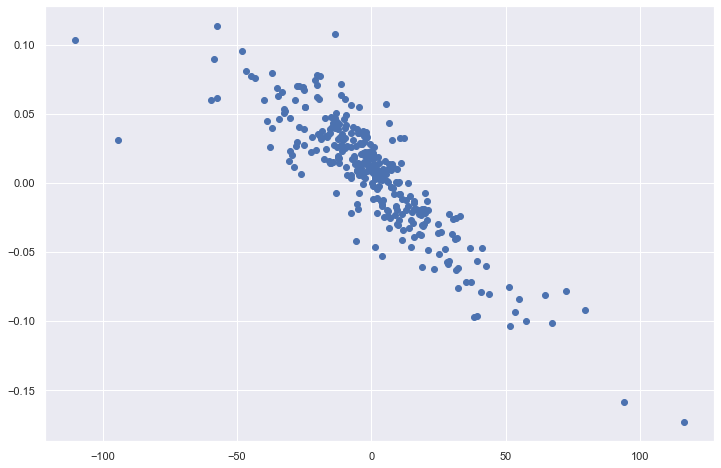

In [46]:
plt.scatter(pca_iw['PC 1'], factors['MKT'])

In [47]:
factors['MKT'].corr(pca_iw['PC 1'])

-0.8706702893522489

In [48]:
y = factors['MKT']
X = pca_rt

reg = LinearRegression(fit_intercept=True)
reg.fit(X, y)

LinearRegression()

In [49]:
reg.coef_

array([-0.00150399, -0.0002519 ])

In [50]:
X.columns

Index(['PC 1', 'PC 2'], dtype='object')

In [51]:
coefficients = pd.DataFrame(index = factors.columns, columns = X.columns)
coefficients

,PC 1,PC 2
MKT,NaN,NaN
HML,NaN,NaN
SMB,NaN,NaN
MOM1,NaN,NaN
MOM36,NaN,NaN
ACC,NaN,NaN
BETA,NaN,NaN
CFP,NaN,NaN
CHCSHO,NaN,NaN
DY,NaN,NaN


In [52]:
index = coefficients.index[0]

for factor in coefficients.index:
    y = factors[factor]
    X = pca_rt

    reg = LinearRegression()
    reg.fit(X, y)
    for i in range(len(coefficients.columns)):
        col = coefficients.columns[i]
        coefficients[col][factor] = reg.coef_[i]

In [53]:
coefficients

,PC 1,PC 2
MKT,-0.001504,-0.000252
HML,0.000145,-0.001083
SMB,-0.000792,0.000456
MOM1,-0.000538,0.000105
MOM36,-0.000222,-0.000242
ACC,-0.000167,0.000425
BETA,0.001867,-0.00094
CFP,0.000361,-0.001317
CHCSHO,0.000584,-0.000694
DY,0.000892,-0.001216


### (c) (30 points) 

Now, run a principal component analysis on the 16 "anomaly factors" and select the optimal number of principal components using the same criterion adopted in the first item of the exercise. By inspecting the principal eigenvectors can you identify a dominating "anomaly"?

In [54]:
standard_factors = (factors - factors.mean(axis=0))/factors.std(axis=0)
standard_factors.head()

,MKT,HML,SMB,MOM1,MOM36,ACC,BETA,CFP,CHCSHO,DY,EP,IDIOVOL,CMA,UMD,RMW,RETVOL
dates,,,,,,,,,,,,,,,,
1991-11-29,-1.146021,-0.942950,0.110054,-0.298999,-0.981611,-0.855086,0.608329,-0.530965,-0.390990,-0.079259,-0.022967,0.643319,-0.726929,0.173469,-0.415524,0.463981
1991-12-31,2.438375,-0.768570,-0.927363,0.228826,-0.830584,-1.573833,-1.458119,-1.015147,-0.356068,-0.565565,-0.299827,-0.753791,-0.259791,1.590413,1.593428,-0.591458
1992-01-31,-0.339177,1.540227,2.716591,1.381237,3.719257,0.951073,-1.288179,0.699949,-0.447614,-0.253274,-0.249191,-1.605470,0.723840,-0.651357,0.178593,-1.459412
1992-02-28,0.104274,2.152085,0.045976,-0.877648,2.691977,0.033673,-0.448956,0.963170,0.500523,0.243548,0.381386,-0.229440,0.867106,-0.215804,0.764371,-0.435358
1992-03-31,-0.764238,1.164027,-0.532641,-0.357583,0.775803,0.071737,0.710532,0.978913,0.559947,0.563717,0.827889,1.077129,0.994599,-0.166317,-0.852409,0.475367


In [55]:
# check
print(sum(round(standard_factors.mean(axis=0), 10) == 0))
print(sum(round(standard_factors.std(axis=0), 10) == 1))

16
16


In [56]:
pca = PCA()
pca.fit(standard_factors)

PCA()

Given the desired number of $\mathrm{PCs}$, say $1 \leq k \leq n$, we collect all the vectors $\gamma_1, \ldots \gamma_k$ in a $(n \times k)$ matrix
$$
\Gamma_k:=\left(\gamma_1, \ldots \gamma_k\right)
$$

In [57]:
gamma = pca.components_

The transformed dataset containing only the first $k P C s$ is the $(T \times k)$ matrix is given by
$$
\begin{aligned}
Z_{(k)}&:=\boldsymbol{X} \boldsymbol{\Gamma}_k \\
&:=\left(Z_1, \ldots, Z_k\right) .
\end{aligned}
$$

In [58]:
Z = pca.fit_transform(standard_factors)

Also, by construction, the columns of $Z_{(k)}$ (the PCs) are orthogonal random variables, and with sample variances $\lambda_1, \ldots, \lambda_k$.

Thus, the sample covariance matrix of $Z_{(k)}$ is given by the $(k \times k)$ diagonal matrix
$$
\boldsymbol{\Lambda}_k:=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_k\right)
$$

In [59]:
lambdas = pca.explained_variance_

It is a good idea to start by running a full PCA $(k=n)$ and plotting the quantity
$$
\alpha_j=\frac{\lambda_j}{\sum_{j=1}^n \lambda_j} 
$$
for $j \in\{1, \ldots, n\}$.

In [60]:
alphas = pca.explained_variance_ratio_
cumulated_alphas = pca.explained_variance_ratio_.cumsum()

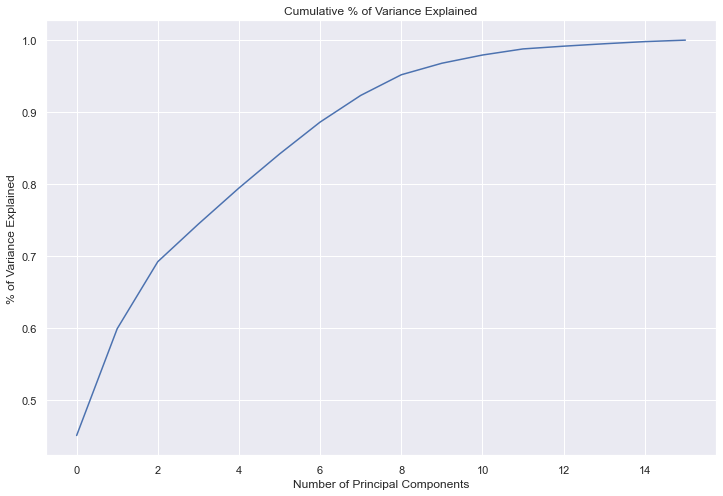

In [61]:
plt.plot(cumulated_alphas)
plt.xlabel('Number of Principal Components')
plt.ylabel('% of Variance Explained')
plt.title('Cumulative % of Variance Explained');

In [62]:
name_cols = []
for i in range(Z.shape[1]):
    name_col = f'PC {i+1}'
    name_cols.append(name_col)

In [63]:
components = pd.DataFrame(Z, index=daterange, columns=name_cols)
components.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16
dates,,,,,,,,,,,,,,,,
1991-11-29,-0.278148,-1.599363,0.143495,-0.299955,-0.015209,0.350405,-0.472166,1.569899,0.368649,-0.427946,0.363129,-0.056917,0.259012,0.031260,-0.107358,0.283877
1991-12-31,1.879175,-0.888403,-1.051544,-0.287996,-1.145391,-0.727290,-2.800494,-2.114829,0.176343,-0.515923,-0.112994,0.357277,-0.206992,-0.052208,0.369389,0.278542
1992-01-31,1.771504,4.244434,0.540219,-1.050066,-0.000823,2.160217,2.244922,-1.143340,0.099143,-0.393804,-0.737248,-0.383635,0.392368,0.063287,0.078482,-0.307877
1992-02-28,-1.113102,2.512442,0.693303,-0.470979,1.219654,0.531243,0.458542,-2.018107,-0.349805,-0.548962,-0.835649,-0.551846,-0.080460,-0.351453,-0.063383,-0.069378
1992-03-31,-2.573030,1.003363,0.575700,0.222798,0.236431,-0.182727,0.550762,0.279493,-0.231233,0.132833,-0.262890,-0.184186,0.245576,-0.249028,-0.219433,0.208476


In [64]:
Lambda = covariance_matrix(components, components)

Also, by construction, the columns of $Z_{(k)}$ (the $\mathrm{PCs}$) are orthogonal random variables, and with sample variances $\lambda_1, \ldots, \lambda_k$.
Thus, the sample covariance matrix of $Z_{(k)}$ is given by the $(k \times k)$ diagonal matrix
$$
\boldsymbol{\Lambda}_k:=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_k\right) .
$$

In [65]:
Lambda.head(10)[['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10']]

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
PC 1,7.215809,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
PC 2,0.0,2.373469,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
PC 3,-0.0,-0.0,1.488612,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
PC 4,-0.0,0.0,-0.0,0.835327,0.0,0.0,-0.0,-0.0,-0.0,-0.0
PC 5,-0.0,-0.0,0.0,0.0,0.801514,-0.0,-0.0,-0.0,0.0,-0.0
PC 6,-0.0,-0.0,0.0,0.0,-0.0,0.755694,-0.0,0.0,0.0,0.0
PC 7,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.709358,-0.0,-0.0,-0.0
PC 8,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.592042,0.0,0.0
PC 9,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.459,-0.0
PC 10,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.256149


In [66]:
lambdas[:10]

array([7.21580875, 2.37346896, 1.48861161, 0.83532674, 0.80151448,
       0.7556935 , 0.70935809, 0.59204181, 0.45900026, 0.25614865])

#### Rule of Thumb
Stop at a $k$ such that the $(k+1)$-th PC does not add much to the already explained variance (say $<3 \%$ ).

In [67]:
# rule of thumb
rule_rt = alphas >= 0.03
n_pca_rt = sum(rule_rt)
n_pca_rt

8

In [68]:
variance_explained = round(cumulated_alphas[n_pca_rt - 1]*100, 2)
print(f'The first {n_pca_rt} explain {variance_explained}% of the returns variance.')

The first 8 explain 92.32% of the returns variance.


#### Informal Way
Choose the number of components such that a large portion (say 90\%) of the variance is explained.

In [69]:
# informal way
rule_iw = cumulated_alphas < 0.9
n_pca_iw = sum(rule_iw)
n_pca_iw

7

In [70]:
variance_explained = round(cumulated_alphas[n_pca_iw - 1]*100, 2)
print(f'The first {n_pca_iw} explain {variance_explained}% of the returns variance.')

The first 7 explain 88.62% of the returns variance.


#### Biggest Drop 

Onatski (2010) suggests looking for the biggest drop computing
$$
r:=\arg \max _{1 \leq j<n} \frac{\lambda_j}{\lambda_{j+1}} .
$$

In [71]:
# biggest drop
r_vector = []
for i in range(len(lambdas)-1):
    r_i = lambdas[i]/lambdas[i+1]
    r_vector.append(r_i)

In [72]:
max_value = max(r_vector)
n_pca_bd = np.argmax(r_vector) + 1
n_pca_bd

1

In [73]:
variance_explained = round(cumulated_alphas[n_pca_bd - 1]*100, 2)
print(f'The first {n_pca_bd} explain {variance_explained}% of the returns variance.')

The first 1 explain 45.1% of the returns variance.


In [74]:
principal_eigenvectors = pd.DataFrame(gamma)
principal_eigenvectors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.222267,-0.270644,0.234228,0.082038,-0.031798,0.220124,-0.332480,-0.297016,-0.345531,-0.188516,-0.337886,-0.350899,-0.243635,-0.054672,0.058894,-0.330887
1,0.245759,0.372644,0.226922,0.121816,0.482677,-0.097378,-0.227725,0.198416,0.032609,0.055896,0.028625,-0.139166,0.325008,-0.224444,-0.408204,-0.231751
2,-0.255643,-0.074532,0.029033,-0.483660,0.346690,0.298691,0.062313,-0.141838,-0.007381,0.066003,-0.228706,-0.058284,0.130642,0.530675,-0.316334,0.045246
3,0.180837,-0.126879,-0.338068,0.107474,-0.037144,0.253010,-0.001360,-0.079218,-0.074999,0.825911,-0.140528,0.025951,-0.000807,-0.181023,-0.112538,-0.008825
4,-0.100395,0.054234,0.041205,-0.745615,0.043209,0.033222,-0.072151,0.126307,0.050099,0.061266,0.047737,-0.056218,-0.203636,-0.560948,0.168895,-0.094087


### (d) (30 points) 
How do the "anomaly-based principal factors" related to the "return-based principal factors"?